# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.utils import shuffle
from sklearn.metrics import silhouette_score 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans, DBSCAN

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [45]:
garisKemiskinan_df = pd.read_csv("garisKemiskinan.csv", delimiter=",")
garisKemiskinan_df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [46]:
rataRataUpah_df = pd.read_csv("rataRataUpah.csv", delimiter=",")
rataRataUpah_df.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


In [47]:
pengeluaran_df = pd.read_csv("pengeluaran.csv", delimiter=",")
pengeluaran_df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [48]:
minUpah_df = pd.read_csv("minUpah.csv", delimiter=",")
minUpah_df.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [49]:
def analisis_data(df):
    print(df.info())
    print("\n-------------------------------------------------------------------------------\n")
    print(f"Data Kosong : \n\n{df.isna().sum()}")
    print("\n-------------------------------------------------------------------------------\n")
    print(f"Data ganda  : {df.duplicated().sum()}")
    print("\n-------------------------------------------------------------------------------\n")
    print(df.describe)

In [50]:
analisis_data(garisKemiskinan_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of        provinsi    jenis              daerah  tahun    periode        gk
0          ACEH  MA

In [51]:
analisis_data(minUpah_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi     0
tahun        0
ump         24
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of       provinsi  tahun        ump
0         ACEH   2002   330000.0
1         ACEH   2003   425000.0
2         ACEH   2004   550000.0
3         ACEH   2005   620000.0
4         ACEH   2006   820000.0
..         ...    ...        ...
730  INDONESIA   2018  2268874.0

In [52]:
analisis_data(pengeluaran_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of        provinsi              daerah    jenis  tahun       peng
0          ACEH           PERDESAAN  MAKANAN   2007   195176.0
1          ACEH      

In [53]:
analisis_data(rataRataUpah_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi    0
tahun       0
upah        0
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of       provinsi  tahun   upah
0         ACEH   2015  11226
1         ACEH   2016  13627
2         ACEH   2017  14809
3         ACEH   2018  13814
4         ACEH   2019  15065
..         ...    ...    ...
275  INDONESIA   2018  15275
276  INDONESIA   2019  15823
277  INDONESIA   2020  

In [54]:
def visualisasi_EDA(df, title):
    plt.title(label=title)
    plt.hist(df, bins=25)
    plt.show()

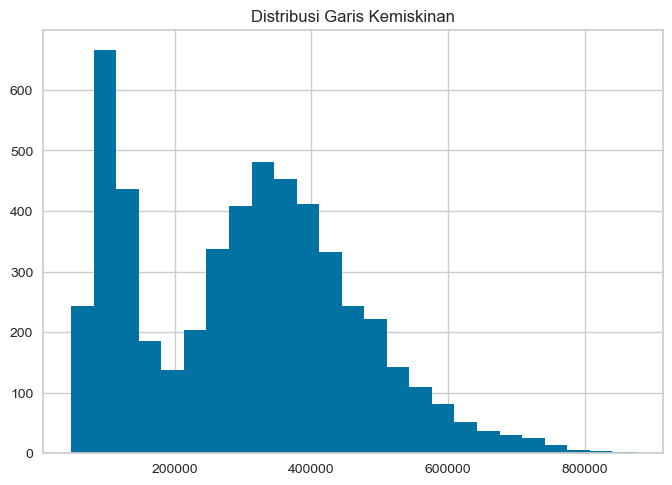

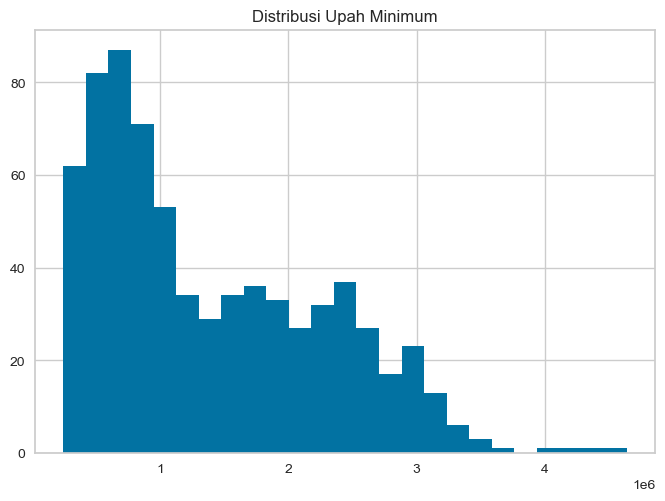

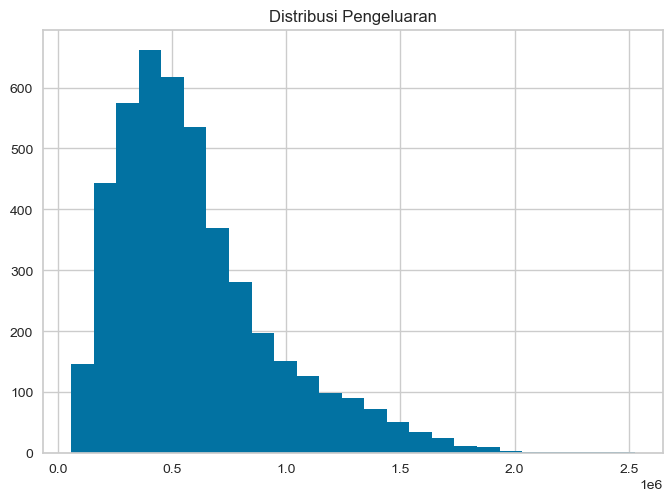

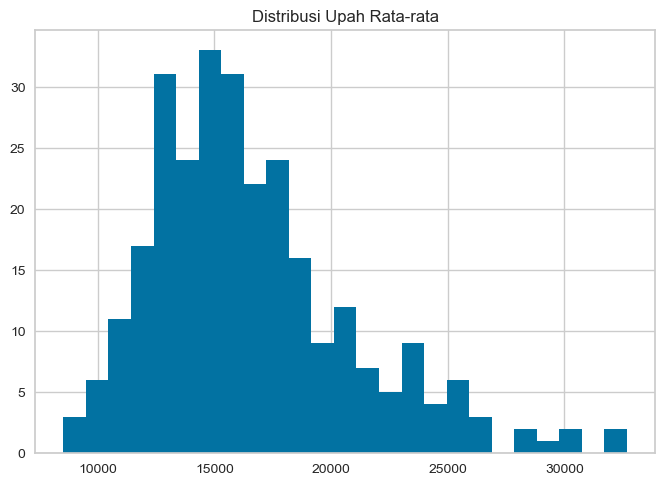

In [55]:
visualisasi_EDA(garisKemiskinan_df["gk"], "Distribusi Garis Kemiskinan")
visualisasi_EDA(minUpah_df["ump"], "Distribusi Upah Minimum")
visualisasi_EDA(pengeluaran_df["peng"], "Distribusi Pengeluaran")
visualisasi_EDA(rataRataUpah_df["upah"], "Distribusi Upah Rata-rata")

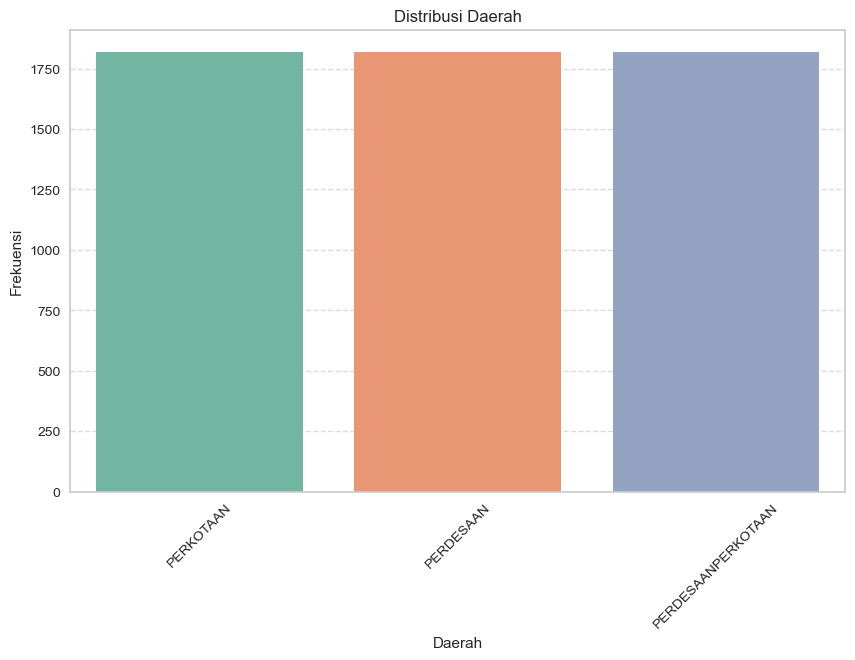

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='daerah', data=garisKemiskinan_df, palette='Set2')
plt.title('Distribusi Daerah')
plt.xlabel('Daerah')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [57]:
def fill_missing(df, col):
    print("---------------------------------------------------------")
    print(f"data sebelumnya : {len(df)}")
    df[col].fillna(value=df[col].mean(), inplace=True)
    print(f"Data kosong di {col} :\n{df.isna().sum()}\n")
    print(f"data setelahnya : {len(df)}\n")
    print("---------------------------------------------------------")

In [58]:
fill_missing(garisKemiskinan_df, "gk")
fill_missing(minUpah_df, "ump")
fill_missing(pengeluaran_df, "peng")
fill_missing(rataRataUpah_df, "upah")

---------------------------------------------------------
data sebelumnya : 5460
Data kosong di gk :
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

data setelahnya : 5460

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 735
Data kosong di ump :
provinsi    0
tahun       0
ump         0
dtype: int64

data setelahnya : 735

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 4620
Data kosong di peng :
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

data setelahnya : 4620

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 280
Data kosong di upah :
provinsi    0
tahun       0
upah        0
dtype: int64

data setelahnya : 280

-------------------------------

In [59]:
def visualisasi_outlier(df, col):
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[[col]])
    plt.show()

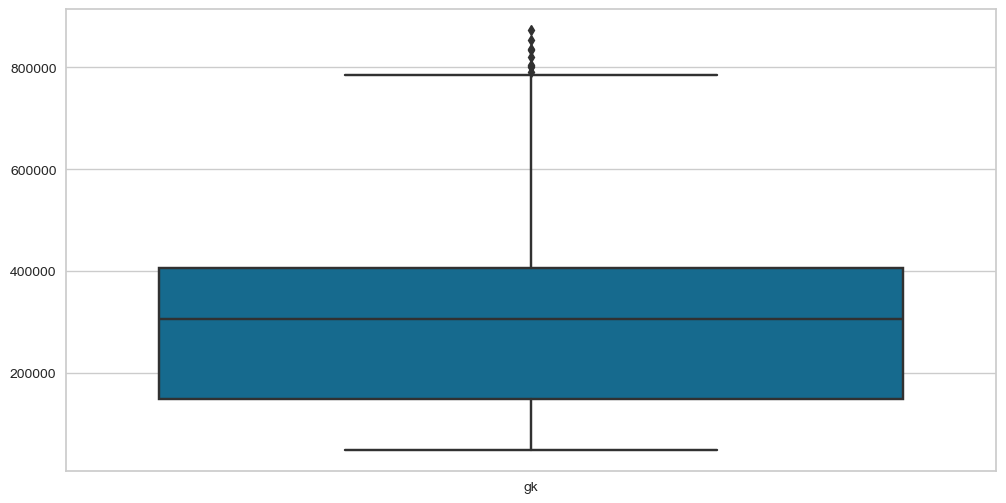

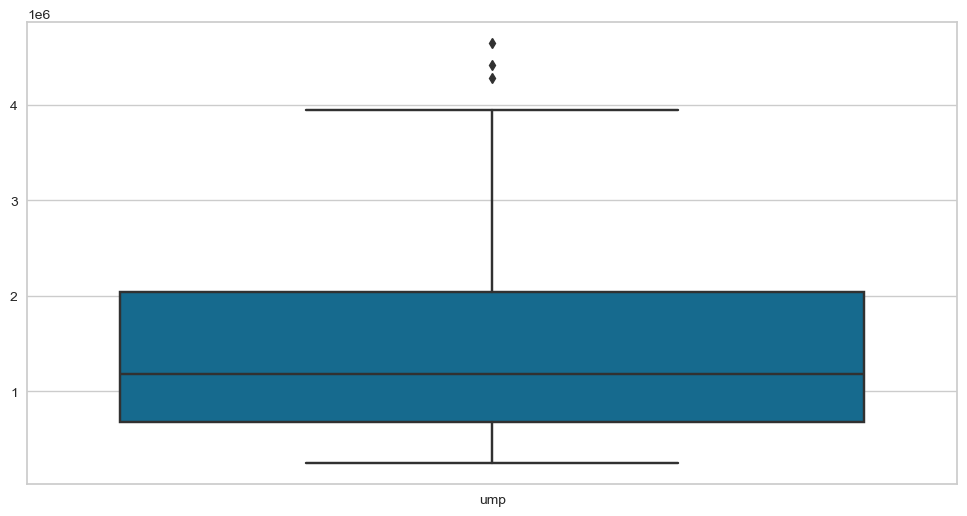

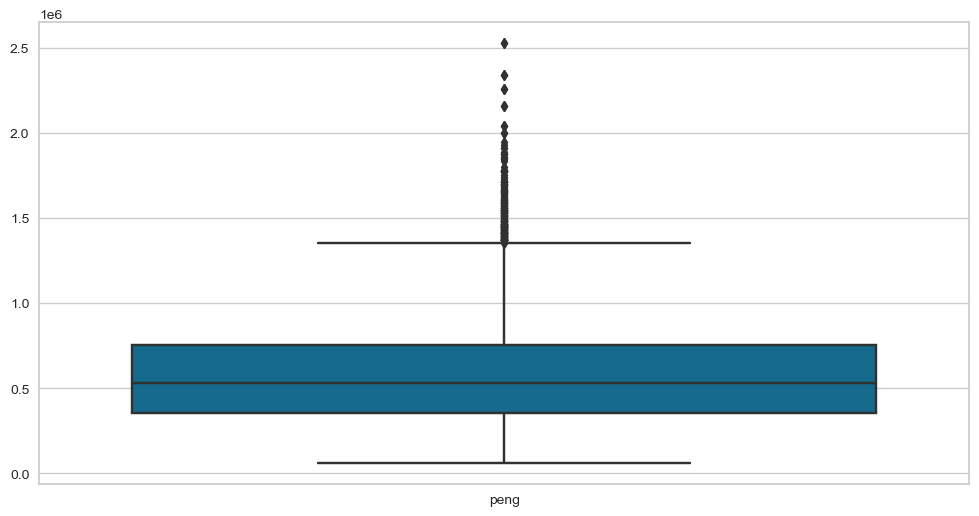

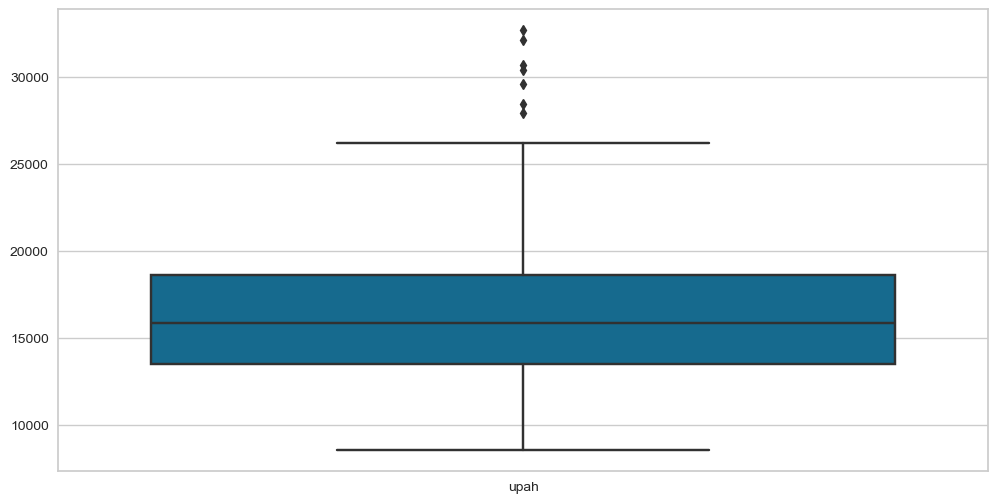

In [60]:
visualisasi_outlier(garisKemiskinan_df, "gk")
visualisasi_outlier(minUpah_df, "ump")
visualisasi_outlier(pengeluaran_df, "peng")
visualisasi_outlier(rataRataUpah_df, "upah")

In [61]:
def handle_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    return df  

In [62]:
garisKemiskinan_df = handle_outlier(garisKemiskinan_df, "gk")
minUpah_df = handle_outlier(minUpah_df, "ump")
pengeluaran_df = handle_outlier(pengeluaran_df, "peng")
rataRataUpah_df = handle_outlier(rataRataUpah_df, "upah")

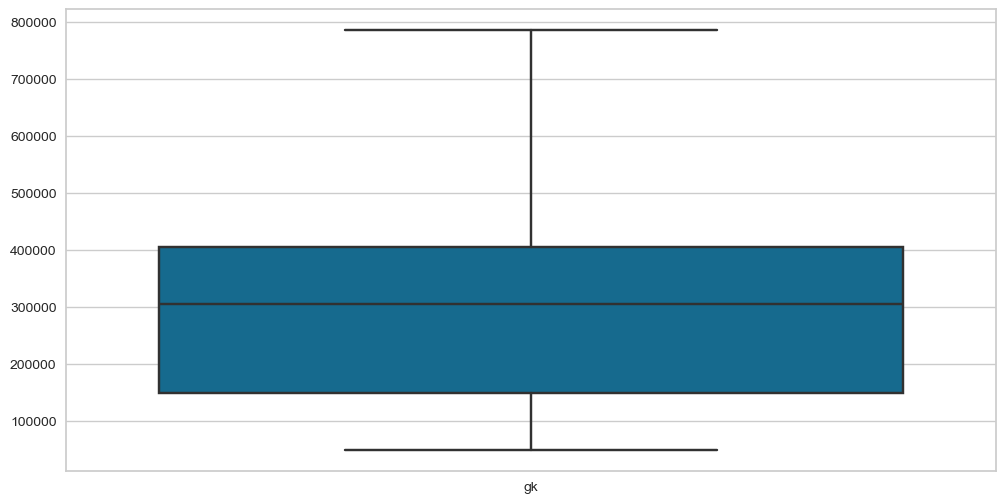

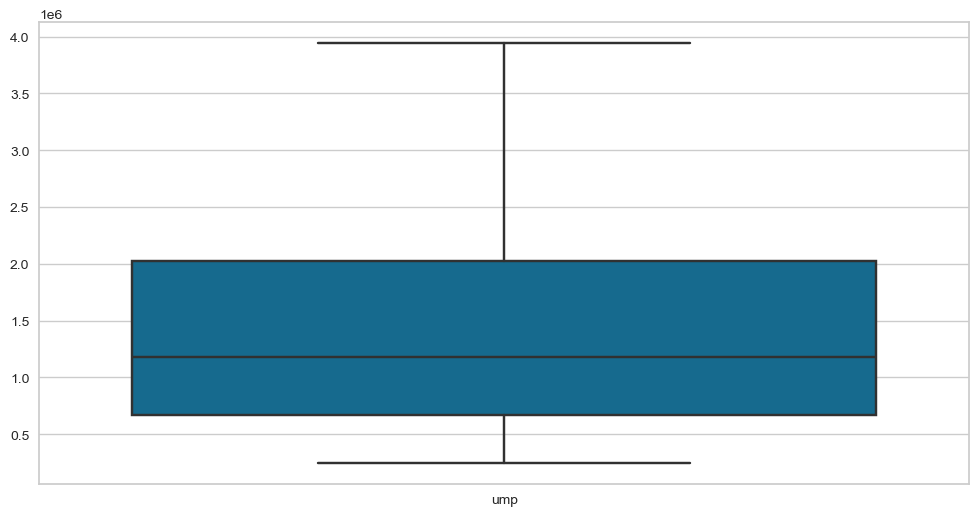

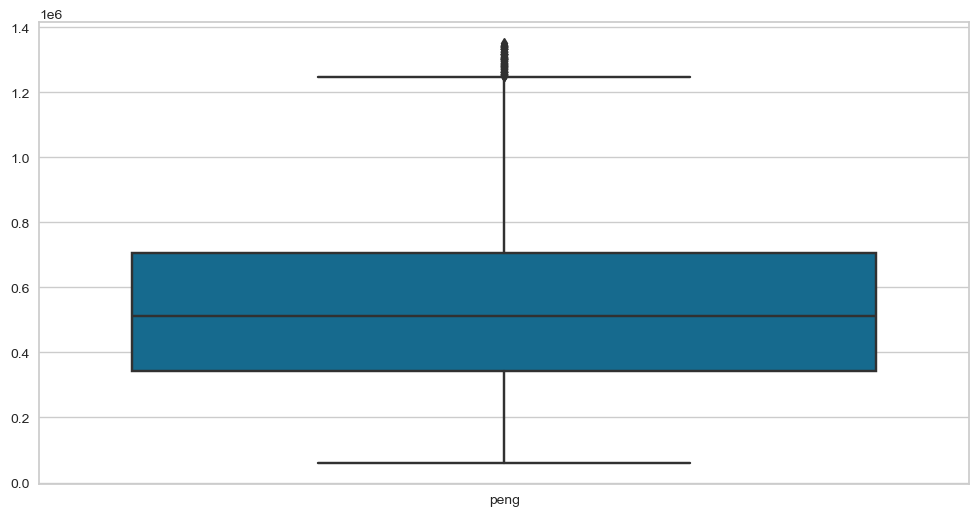

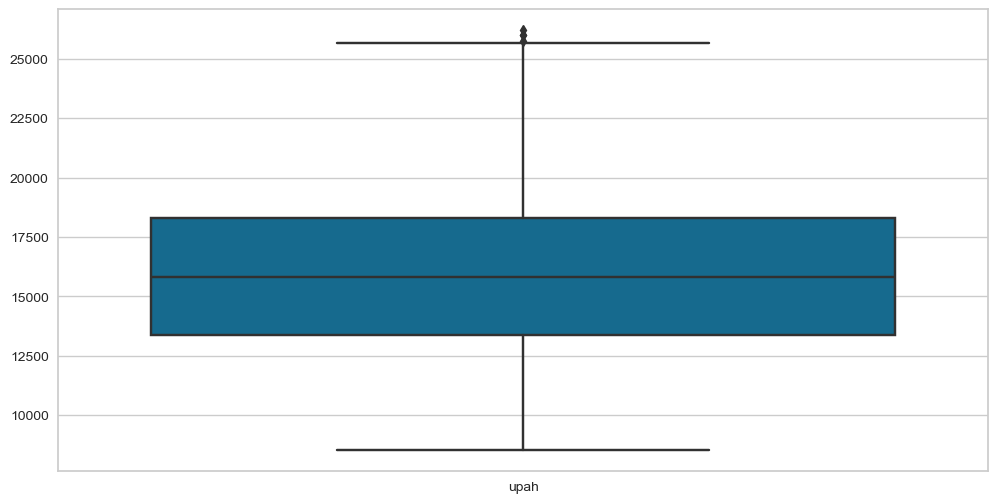

In [63]:
visualisasi_outlier(garisKemiskinan_df, "gk")
visualisasi_outlier(minUpah_df, "ump")
visualisasi_outlier(pengeluaran_df, "peng")
visualisasi_outlier(rataRataUpah_df, "upah")

In [64]:
merged_df = garisKemiskinan_df.merge(minUpah_df, on=['provinsi', 'tahun']) \
                       .merge(pengeluaran_df, on=['provinsi', 'tahun']) \
                       .merge(rataRataUpah_df, on=['provinsi', 'tahun'])

merged_df = merged_df.drop(columns=["daerah_y", "jenis_y", "provinsi", "tahun", "periode"])
merged_df.rename(columns={"daerah_x": "daerah"}, inplace=True)
merged_df.rename(columns={"jenis_x": "jenis"}, inplace=True)

print(merged_df.head())

     jenis     daerah        gk        ump      peng   upah
0  MAKANAN  PERKOTAAN  293697.0  1900000.0  395136.0  11226
1  MAKANAN  PERKOTAAN  293697.0  1900000.0  260183.0  11226
2  MAKANAN  PERKOTAAN  293697.0  1900000.0  655319.0  11226
3  MAKANAN  PERKOTAAN  293697.0  1900000.0  466355.0  11226
4  MAKANAN  PERKOTAAN  293697.0  1900000.0  529945.0  11226


In [65]:
analisis_data(merged_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40733 entries, 0 to 40732
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jenis   40733 non-null  object 
 1   daerah  40733 non-null  object 
 2   gk      40733 non-null  float64
 3   ump     40733 non-null  float64
 4   peng    40733 non-null  float64
 5   upah    40733 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.9+ MB
None

-------------------------------------------------------------------------------

Data Kosong : 

jenis     0
daerah    0
gk        0
ump       0
peng      0
upah      0
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 390

-------------------------------------------------------------------------------

<bound method NDFrame.describe of          jenis              daerah        gk        ump       peng   upah
0      MAKANAN           PERKOTAAN  293697.0  1900000.0 

In [66]:
merged_df = merged_df.drop_duplicates().reset_index(drop=True)

In [67]:
merged_df['income_to_expense_ratio'] = merged_df['ump'] / merged_df['peng']
merged_df['poverty_to_income_ratio'] = merged_df['gk'] / merged_df['ump']
print(merged_df.head())

     jenis     daerah        gk        ump      peng   upah  \
0  MAKANAN  PERKOTAAN  293697.0  1900000.0  395136.0  11226   
1  MAKANAN  PERKOTAAN  293697.0  1900000.0  260183.0  11226   
2  MAKANAN  PERKOTAAN  293697.0  1900000.0  655319.0  11226   
3  MAKANAN  PERKOTAAN  293697.0  1900000.0  466355.0  11226   
4  MAKANAN  PERKOTAAN  293697.0  1900000.0  529945.0  11226   

   income_to_expense_ratio  poverty_to_income_ratio  
0                 4.808471                 0.154577  
1                 7.302552                 0.154577  
2                 2.899351                 0.154577  
3                 4.074150                 0.154577  
4                 3.585278                 0.154577  


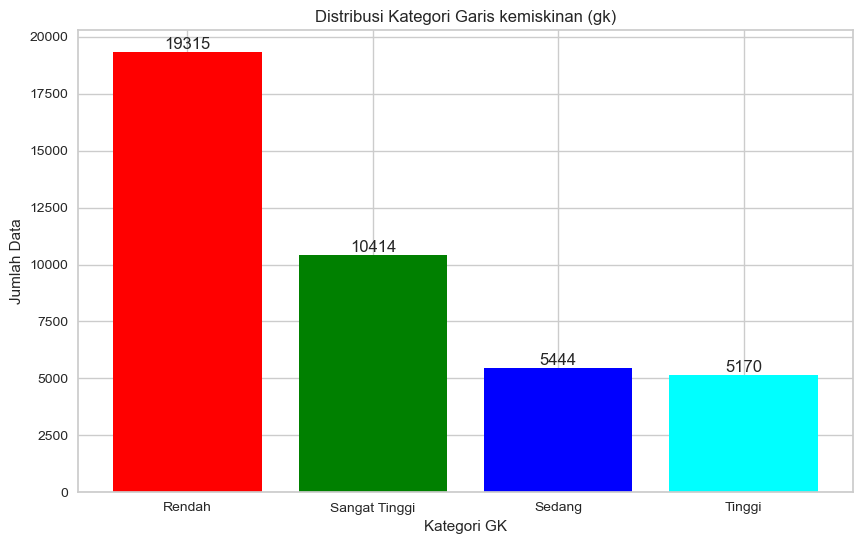

In [68]:
bins = [0, 300000, 350000, 400000, float('inf')]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

merged_df['gk_category'] = pd.cut(merged_df['gk'], bins=bins, labels=labels, right=False)

gk_counts = merged_df['gk_category'].value_counts()

x = gk_counts.index
y = gk_counts.values

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan'])
plt.title("Distribusi Kategori Garis kemiskinan (gk)")
plt.xlabel("Kategori GK")
plt.ylabel("Jumlah Data")

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [ ]:
len(merged_df)
merged_df = merged_df.head(3730)
print(f"Jumlah baris : {len(merged_df)}")

Jumlah baris : 3730


In [ ]:
numeric_feature = ["ump",  "poverty_to_income_ratio", "income_to_expense_ratio"] 
category_feature = ["daerah", "jenis"]

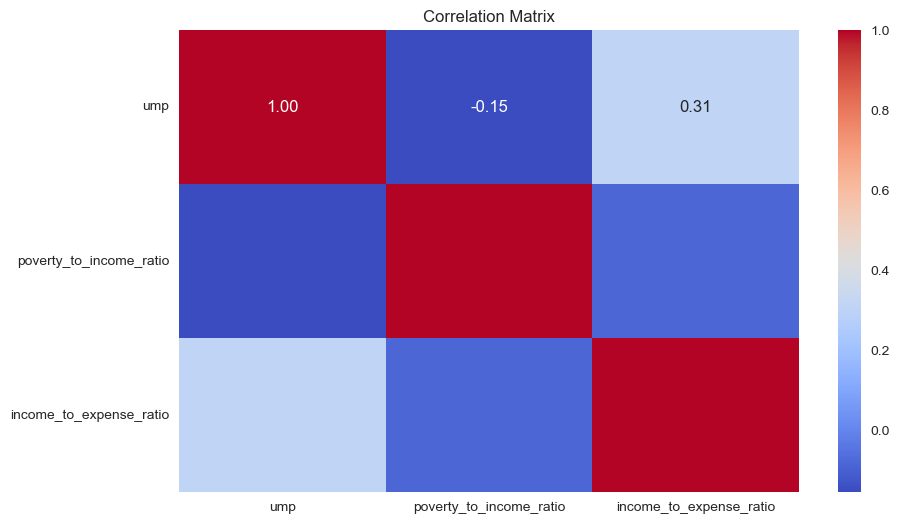

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = merged_df[numeric_feature].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X_num = merged_df[numeric_feature]
X_cat = merged_df[category_feature]

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X_cat)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(category_feature))
X_final = pd.concat([X_num, X_cat_encoded_df], axis=1).reset_index(drop=True)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_final)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_final.columns)

In [ ]:
pca = PCA()
X_transformed = pca.fit_transform(X_scaled_df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
pc_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
X_reduced_df = pd.DataFrame(X_transformed, columns=pc_columns)

In [ ]:
n_Component = np.argmax(explained_variance >= 0.9) + 1 
print(f"Optimal n_Component: {n_Component}")

Optimal n_Component: 4


In [ ]:
pca = PCA(n_components=n_Component)
X_reduced_df = pd.DataFrame(pca.fit_transform(X_scaled_df), 
                            columns=[f'PC{i+1}' for i in range(n_Component)])

In [ ]:
sample_fraction = 0.3
n_samples = int(len(X_reduced_df) * sample_fraction)
sample_data = shuffle(X_reduced_df, random_state=88).iloc[:n_samples]

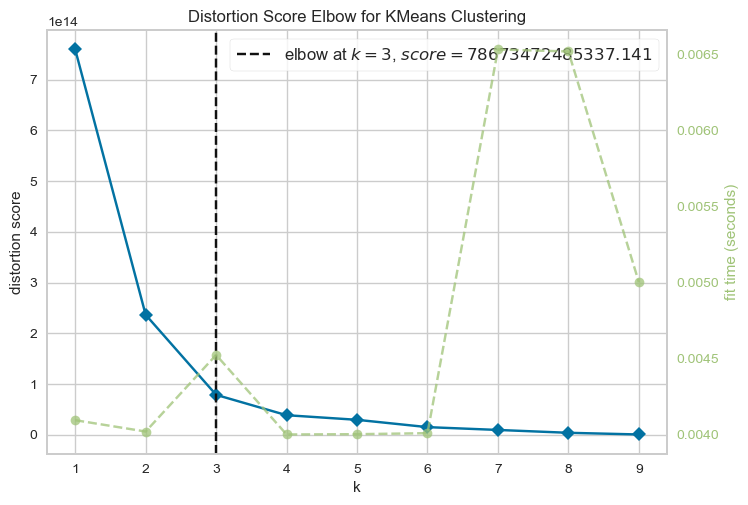

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

from yellowbrick.cluster import KElbowVisualizer
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_final)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 5
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans.fit(X_final)  # X_final adalah data yang sudah diproses (numerik + encoded kategorikal)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_ump = cluster_data['ump'].mean()  # Rata-rata Upah Minimum (ump)
        mean_poverty_to_income_ratio = cluster_data['poverty_to_income_ratio'].mean()  # Rata-rata Poverty-to-Income Ratio
        mean_income_to_expense_ratio = cluster_data['income_to_expense_ratio'].mean()  # Rata-rata Income-to-Expense Ratio
        daerah_mode = cluster_data['daerah'].mode()[0]  # Daerah paling umum
        jenis_mode = cluster_data['jenis'].mode()[0]  # Jenis paling umum

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Upah Minimum (ump): {mean_ump:.2f}")
        print(f"Rata-rata Poverty-to-Income Ratio: {mean_poverty_to_income_ratio:.2f}")
        print(f"Rata-rata Income-to-Expense Ratio: {mean_income_to_expense_ratio:.2f}")
        print(f"Daerah Paling Umum: {daerah_mode}")
        print(f"Jenis Paling Umum: {jenis_mode}")

# Analisis karakteristik setiap cluster
analyze_clusters(merged_df, labels, k)

# Menghitung Silhouette Score
sil_score = silhouette_score(X_final, labels)
print(f"Silhouette Score: {sil_score:.2f}")

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Upah Minimum (ump): 2480704.11
Rata-rata Poverty-to-Income Ratio: 0.14
Rata-rata Income-to-Expense Ratio: 3.86
Daerah Paling Umum: PERDESAAN
Jenis Paling Umum: MAKANAN

Cluster 2:
Rata-rata Upah Minimum (ump): 1900818.07
Rata-rata Poverty-to-Income Ratio: 0.15
Rata-rata Income-to-Expense Ratio: 3.57
Daerah Paling Umum: PERKOTAAN
Jenis Paling Umum: MAKANAN

Cluster 3:
Rata-rata Upah Minimum (ump): 3097680.79
Rata-rata Poverty-to-Income Ratio: 0.12
Rata-rata Income-to-Expense Ratio: 4.95
Daerah Paling Umum: PERDESAAN
Jenis Paling Umum: MAKANAN
Silhouette Score: 0.71


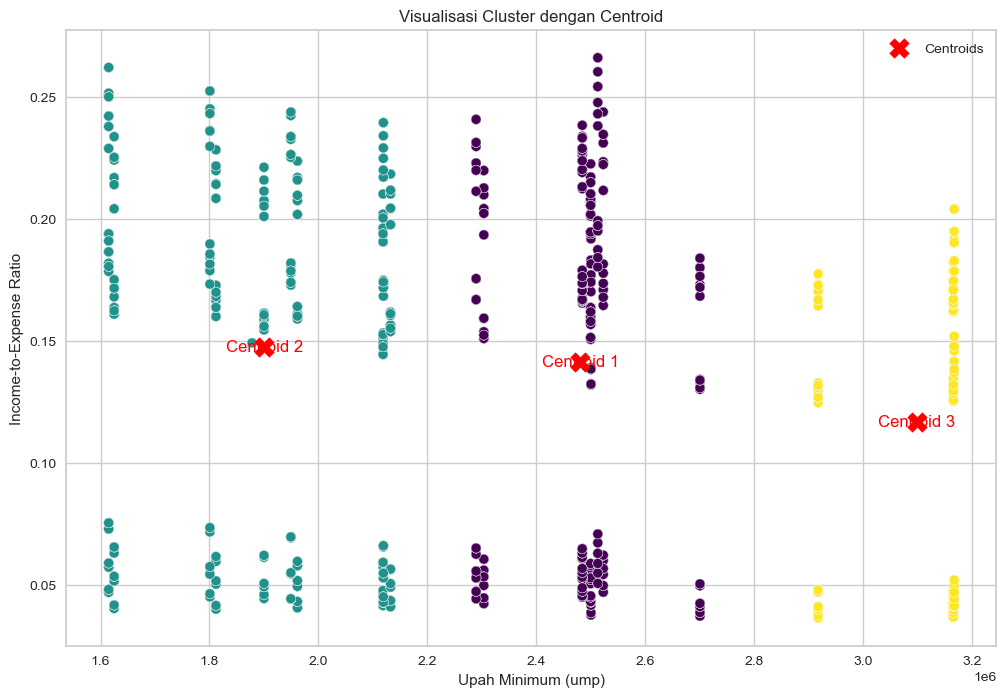

Nilai Centroids:
Centroid 1:
  - Upah Minimum (ump): 2480704.11
  - Poverty-to-Income Ratio: 0.14
  - Income-to-Expense Ratio: 3.86
Centroid 2:
  - Upah Minimum (ump): 1900818.07
  - Poverty-to-Income Ratio: 0.15
  - Income-to-Expense Ratio: 3.57
Centroid 3:
  - Upah Minimum (ump): 3097680.79
  - Poverty-to-Income Ratio: 0.12
  - Income-to-Expense Ratio: 4.95


In [ ]:
import matplotlib.pyplot as plt

# **1. Menentukan Posisi Centroid**
centroids = kmeans.cluster_centers_

# **2. Visualisasi Cluster**
plt.figure(figsize=(12, 8))

# **3. Plot Data**
# Gunakan dua fitur pertama untuk visualisasi (misalnya 'ump' dan 'income_to_expense_ratio')
plt.scatter(X_final.iloc[:, 0], X_final.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# **4. Plot Centroid**
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# **5. Menambahkan Label Centroid pada Plot**
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# **6. Menambahkan Judul dan Label**
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Upah Minimum (ump)')  # Sumbu X: Fitur pertama (ump)
plt.ylabel('Income-to-Expense Ratio')  # Sumbu Y: Fitur kedua (income_to_expense_ratio)
plt.legend()

plt.show()

# **7. Menampilkan Nilai Centroid**
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}:")
    print(f"  - Upah Minimum (ump): {centroid[0]:.2f}")
    print(f"  - Poverty-to-Income Ratio: {centroid[1]:.2f}")
    print(f"  - Income-to-Expense Ratio: {centroid[2]:.2f}")

In [ ]:
# bandwidth_vals = np.linspace(0.1, 1, 10) 
# silhouette_scores = []

# for bw in bandwidth_vals:
#     ms = MeanShift(bandwidth=bw)
#     cluster_labels = ms.fit_predict(X_reduced_df)

#     # Only append if there is more than one cluster
#     if len(set(cluster_labels)) > 1:
#         silhouette_scores.append(silhouette_score(X_reduced_df, cluster_labels))
#     else:
#         silhouette_scores.append(-1)
# aaa
# plt.plot(bandwidth_vals, silhouette_scores)
# plt.xlabel("Bandwidth")
# plt.ylabel("Silhouette Score")
# plt.title("Silhouette Score for Different Bandwidths")
# plt.show()


In [ ]:
mean_shift = MeanShift(bandwidth=0.1)
mean_shift_labels = mean_shift.fit_predict(X_reduced_df)
merged_df['cluster_ms'] = mean_shift_labels

In [ ]:
n_clusters_ = len(np.unique(mean_shift_labels))
print(f"Jumlah Cluster yang Ditemukan: {n_clusters_}")

Jumlah Cluster yang Ditemukan: 986


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(bandwidth_vals, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Bandwidth")
plt.ylabel("Silhouette Score")
plt.show()

NameError: name 'bandwidth_vals' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
mean_shift_sil_score = silhouette_score(X_reduced_df, mean_shift_labels)
print(f"Silhouette Score: {mean_shift_sil_score}")

Silhouette Score: 0.7018360202723966


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

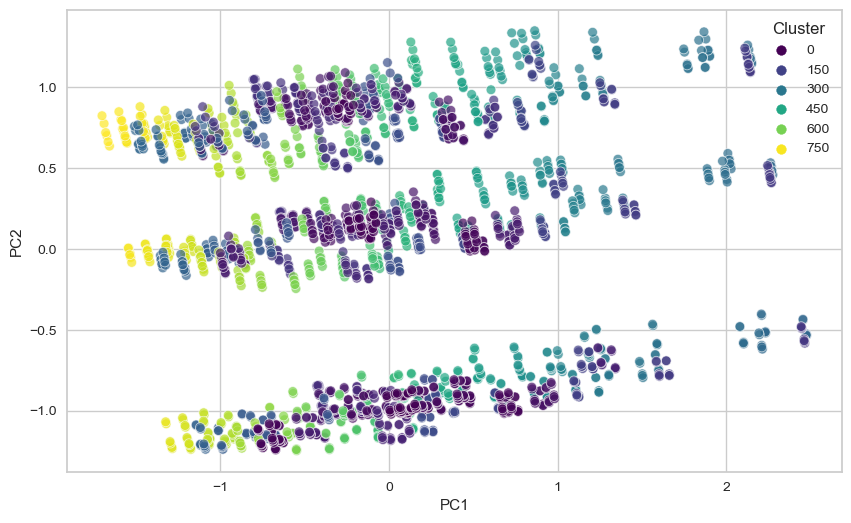

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced_df['PC1'], y=X_reduced_df['PC2'], hue=merged_df['cluster_ms'], palette='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


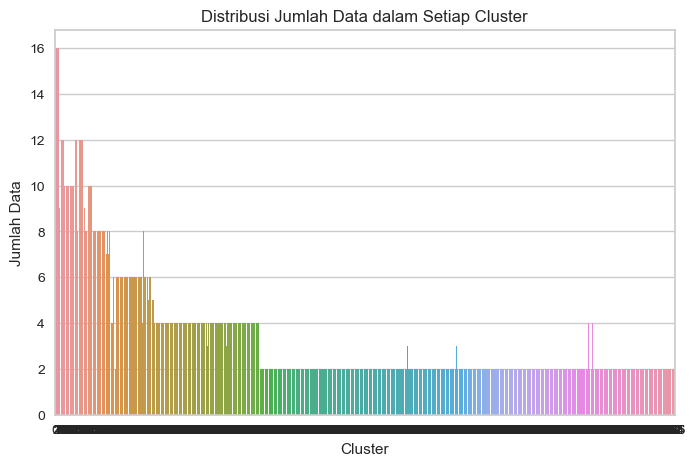

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=merged_df['cluster_ms'])
plt.title("Distribusi Jumlah Data dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

# Analisis Karakteristik Cluster dari Model Mean Shift

## Cluster 1 :
- Garis Kemiskinan (gk) rendah, Upah Minimum (ump) rendah, Pengeluaran (peng) rendah
- **Analisis:** Cluster ini terdiri dari daerah dengan tingkat ekonomi lebih rendah, dengan pendapatan dan pengeluaran yang lebih kecil dibandingkan cluster lain.

## Cluster 2 :
- Garis Kemiskinan (gk) tinggi, Upah Minimum (ump) sedang, Pengeluaran (peng) tinggi
- **Analisis:** Cluster ini terdiri dari daerah dengan tingkat kemiskinan tinggi, tetapi memiliki upah minimum yang relatif lebih tinggi. Mungkin merupakan daerah dengan biaya hidup yang lebih tinggi.

## Cluster 3 :
- Garis Kemiskinan (gk) sedang, Upah Minimum (ump) tinggi, Pengeluaran (peng) sangat tinggi
- **Analisis:** Cluster ini mencakup daerah dengan pendapatan yang lebih tinggi, tetapi juga memiliki tingkat pengeluaran yang sangat besar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
merged_df.to_csv("hasil_clustering.csv", index=False)
print("File hasil_clustering.csv telah berhasil dibuat.")

File hasil_clustering.csv telah berhasil dibuat.
